In [1]:
import os
from TrainInference import data_spilt, ReadH5Pkld, get_loader
from TrainInference import inference_net, data_all, get_roc, inference_radiologist
from monai.transforms import *



import torch



from vit_classifier import vit_classifier



device = 'cuda:0'
seed = 325





train_list, inference_list = data_spilt('/raid/candi/xiangcen/patient_level/promise_patient_level', 462, seed)

inference_transform = ReadH5Pkld()

inference_loader = get_loader(inference_list, inference_transform, batch_size=1, shuffle=False, drop_last=False)



model = vit_classifier(6)
model.load_state_dict(torch.load('/home/xiangcen/PatientBiopsyDetect/models/model_weights_pirAgle_68.pth', map_location=device))


gleason_cutoff = 2
tpr, tnr, auc = get_roc(
    model,
    inference_loader,
    device=device,
    steps = 19,
    gleason_cutoff=gleason_cutoff
)
tpr_r, tnr_r, auc_r= inference_radiologist(inference_loader, gleason_cutoff)

/home/xiangcen/Software/miniconda3/envs/llm/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
tpr_r, tnr_r, auc_r, tpr, tnr, auc

(tensor([1.0000, 0.9322, 0.6949, 0.4237, 0.0000]),
 tensor([0.0000, 0.2195, 0.6829, 0.9756, 1.0000]),
 0.7579578757286072,
 tensor([1.0000, 0.9492, 0.9322, 0.8136, 0.7288, 0.6271, 0.5932, 0.5085, 0.4746,
         0.3898, 0.2881, 0.2373, 0.1695, 0.1186, 0.0847, 0.0678, 0.0508, 0.0169,
         0.0000]),
 tensor([0.0000, 0.1951, 0.3902, 0.5122, 0.5854, 0.6098, 0.6098, 0.7073, 0.7317,
         0.7805, 0.8049, 0.8537, 0.8780, 0.9512, 0.9756, 1.0000, 1.0000, 1.0000,
         1.0000]),
 0.6808598041534424)

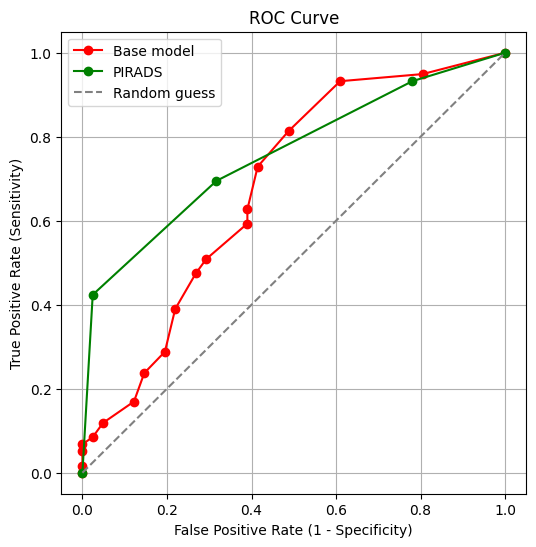

In [3]:
import matplotlib.pyplot as plt
import torch


# plot ROC
plt.figure(figsize=(6,6))
plt.plot(1-tnr, tpr, marker='o', color='red', label="Base model")
plt.plot(1-tnr_r, tpr_r, marker='o', color='green', label="PIRADS")
plt.plot([0,1], [0,1], linestyle='--', color='gray', label="Random guess")

plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)


In [4]:
# import os
# from TrainInference import data_spilt, ReadH5Pkld, get_loader
# from TrainInference import inference_net, data_all, get_roc, inference_radiologist

# inference_list = data_all('/raid/candi/xiangcen/patient_level/promise_patient_level')

# inference_transform = ReadH5Pkld()

# inference_loader = get_loader(inference_list, inference_transform, batch_size=1, shuffle=False, drop_last=False)

# tpr_r, tnr_r = inference_radiologist(inference_loader)